In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bronze.csv')
df

,time,latitude,longitude,depth,mag,magType,net,id,updated,place
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,15.00,6.3,mw,iscgem,iscgem907791,2015-05-13T18:52:43.000Z,NaN
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,10.00,7.4,mw,iscgem,iscgem907777,2015-05-13T18:52:43.000Z,NaN
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,35.00,6.2,mw,iscgem,iscgem907773,2015-05-13T18:52:43.000Z,NaN
3,1930-11-28T07:32:56.000Z,18.7790,-106.7670,15.00,6.3,mw,iscgem,iscgem907769,2015-05-13T18:52:43.000Z,NaN
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,15.00,6.9,mw,iscgem,iscgem907761,2015-05-13T18:52:43.000Z,NaN
...,...,...,...,...,...,...,...,...,...,...
797041,2018-09-01T01:14:38.230Z,-30.4830,-177.9279,43.90,4.3,mb,us,us2000hafq,2018-11-07T18:37:12.040Z,NaN
797042,2018-09-01T01:07:59.120Z,-10.7558,124.3621,10.00,4.0,mb,us,us2000hafw,2018-11-07T18:37:12.040Z,NaN
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,217.56,4.6,mb,us,us2000h6as,2018-11-07T18:37:07.040Z,NaN
797044,2018-09-01T00:27:11.440Z,46.8819,155.6566,10.00,4.3,mb,us,us2000hafn,2018-11-07T18:37:12.040Z,NaN


In [3]:
df.shape

(797046, 10)

In [4]:
df.describe()

,latitude,longitude,depth,mag,place
count,797046.000000,797046.000000,797041.000000,797046.000000,0.0
mean,19.038314,-12.911692,53.726903,3.884296,NaN
std,29.219884,118.010192,99.510254,0.911611,NaN
min,-84.422000,-179.999000,-4.900000,2.500000,NaN
25%,-4.727000,-118.086000,10.000000,3.000000,NaN
50%,29.826000,-52.385000,23.000000,4.000000,NaN
75%,39.405000,120.892000,45.620000,4.600000,NaN
max,87.221000,180.000000,735.800000,9.500000,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 797046 entries, 0 to 797045
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       797046 non-null  object 
 1   latitude   797046 non-null  float64
 2   longitude  797046 non-null  float64
 3   depth      797041 non-null  float64
 4   mag        797046 non-null  float64
 5   magType    796940 non-null  object 
 6   net        797046 non-null  object 
 7   id         797046 non-null  object 
 8   updated    797046 non-null  object 
 9   place      0 non-null       float64
dtypes: float64(5), object(5)
memory usage: 60.8+ MB


In [6]:
df.nunique()

,0
time,796942
latitude,251412
longitude,354837
depth,47573
mag,373
magType,24
net,19
id,797046
updated,666237
place,0


dropping Unnecessary columns

In [7]:
df = df.drop(columns=['id', 'net', 'updated', 'place', 'time'])
df

,latitude,longitude,depth,mag,magType
0,23.2610,120.2770,15.00,6.3,mw
1,18.2330,96.2980,10.00,7.4,mw
2,25.8540,98.3560,35.00,6.2,mw
3,18.7790,-106.7670,15.00,6.3,mw
4,35.0500,139.1290,15.00,6.9,mw
...,...,...,...,...,...
797041,-30.4830,-177.9279,43.90,4.3,mb
797042,-10.7558,124.3621,10.00,4.0,mb
797043,-5.5167,147.1735,217.56,4.6,mb
797044,46.8819,155.6566,10.00,4.3,mb


Checking Null Values
Found-5

In [8]:
df.isna().sum()

,0
latitude,0
longitude,0
depth,5
mag,0
magType,106


In [9]:
df=df.dropna()

Converting Categorical Variables into Numerical Variables

In [10]:
le=LabelEncoder()
df['magType']=le.fit_transform(df['magType'])

<ipython-input-10-6801b2a258fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['magType']=le.fit_transform(df['magType'])


In [11]:
df

,latitude,longitude,depth,mag,magType
0,23.2610,120.2770,15.00,6.3,19
1,18.2330,96.2980,10.00,7.4,19
2,25.8540,98.3560,35.00,6.2,19
3,18.7790,-106.7670,15.00,6.3,19
4,35.0500,139.1290,15.00,6.9,19
...,...,...,...,...,...
797041,-30.4830,-177.9279,43.90,4.3,8
797042,-10.7558,124.3621,10.00,4.0,8
797043,-5.5167,147.1735,217.56,4.6,8
797044,46.8819,155.6566,10.00,4.3,8


EDA

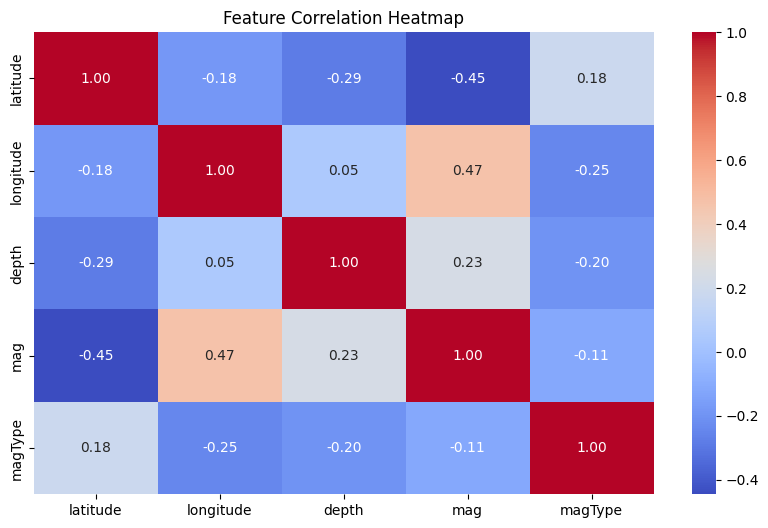

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()


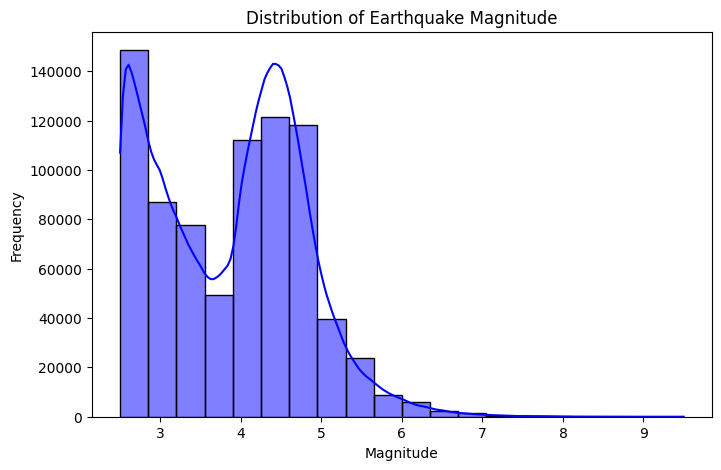

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['mag'], bins=20, kde=True, color='blue')
plt.title("Distribution of Earthquake Magnitude")
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.show()

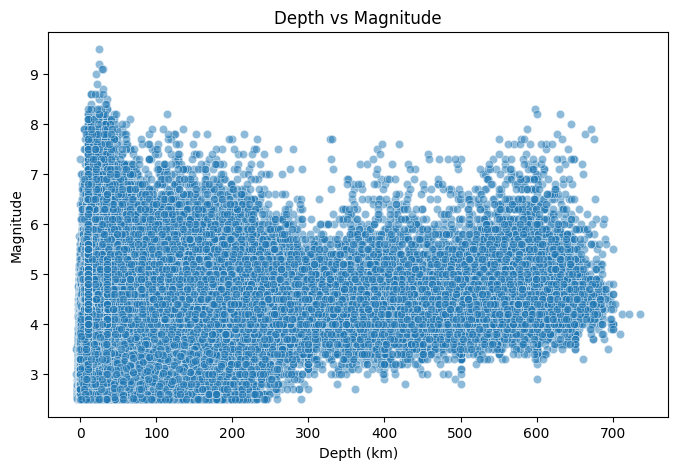

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['depth'], y=df['mag'], alpha=0.5)
plt.title("Depth vs Magnitude")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.show()


In [15]:
x=df.drop('mag',axis=1)
y=df['mag']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [17]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.transform(X_test)

In [20]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(max_depth=5),
    "Random Forest": RandomForestRegressor(n_estimators=50, max_depth=5, random_state=42),
    "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBRegressor": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [21]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f" - Mean Absolute Error: {mae:.4f}")
    print(f" - R² Score: {r2:.4f}\n")


Model: Linear Regression
 - Mean Absolute Error: 0.5767
 - R² Score: 0.3699

Model: Decision Tree
 - Mean Absolute Error: 0.3233
 - R² Score: 0.7868

Model: Random Forest
 - Mean Absolute Error: 0.3223
 - R² Score: 0.7884

Model: KNN Regressor
 - Mean Absolute Error: 0.3105
 - R² Score: 0.7947

Model: XGBRegressor
 - Mean Absolute Error: 0.2991
 - R² Score: 0.8163



After testing multiple models, I found that XGBoost delivers the best performance.